# Internship Project: Classification Algorithms Comparison
## Objective
Implement and optimize multiple classification algorithms on the Heart Disease dataset.


## 1. Data Preprocessing
- Load and inspect dataset
- Handle missing values
- Feature scaling & selection
- Train/Test split


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Load dataset
df = pd.read_csv('heart.csv')  # Replace with your dataset path
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Handle Missing Values, Scaling, and Splitting

In [4]:
# Check for missing values
print(df.isnull().sum())

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


((820, 13), (205, 13))

## 2. Implement Classification Models
- Logistic Regression
- KNN
- SVM
- Decision Tree
- Random Forest
- Gradient Boosting


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained.')

Logistic Regression trained.
KNN trained.
SVM trained.
Decision Tree trained.
Random Forest trained.
Gradient Boosting trained.


## 3. Hyperparameter Tuning
Use GridSearchCV or RandomizedSearchCV for tuning hyperparameters.

In [6]:
from sklearn.model_selection import GridSearchCV

# Example: Grid Search for Decision Tree
param_grid = {'max_depth': [3, 5, 7, None], 'min_samples_split': [2, 5, 10]}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print('Best Parameters:', grid.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2}


## 4. Model Evaluation and Comparison
Metrics: Accuracy, Precision, Recall, F1-score, AUC-ROC

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_prob)
    }

pd.DataFrame(results).T

,Accuracy,Precision,Recall,F1-score,AUC-ROC
Logistic Regression,0.795122,0.756303,0.873786,0.810811,0.879022
KNN,0.834146,0.800000,0.893204,0.844037,0.950838
SVM,0.887805,0.850877,0.941748,0.894009,0.963164
Decision Tree,0.985366,1.000000,0.970874,0.985222,0.985437
Random Forest,0.985366,1.000000,0.970874,0.985222,1.000000
Gradient Boosting,0.931707,0.915888,0.951456,0.933333,0.980678


## 5. Model Optimization
- Regularization, feature engineering, ensemble methods (Voting, Stacking)


## 6. Final Model Evaluation
Train best model on full training set and summarize results.

## Visualizations
Let's add plots for better understanding of model performances:
- Confusion Matrix
- ROC Curves
- Feature Importances (Tree-based models)

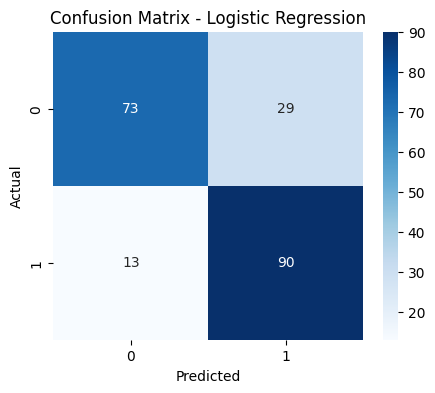

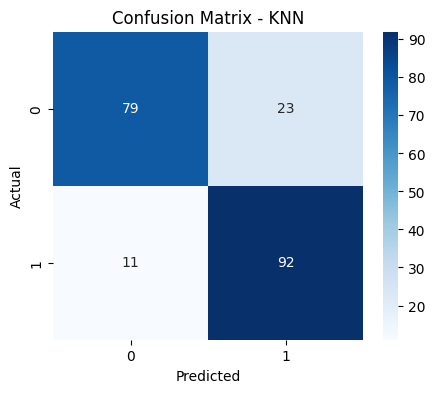

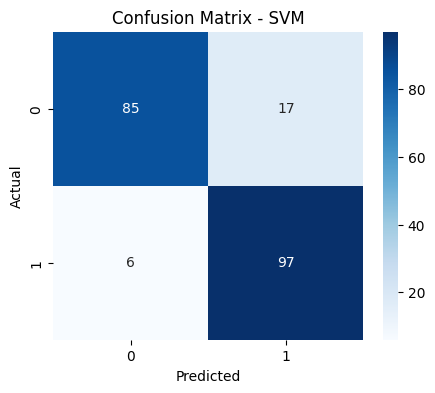

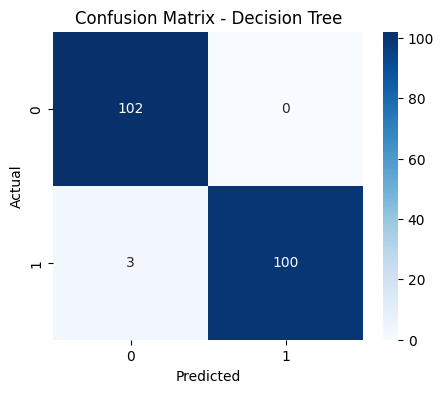

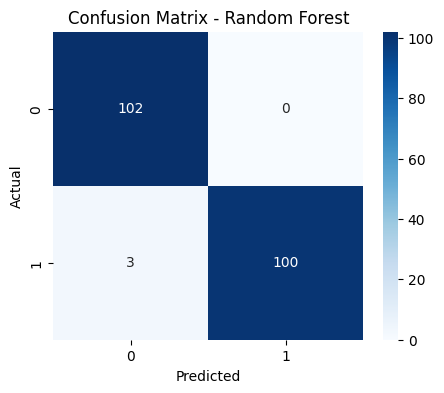

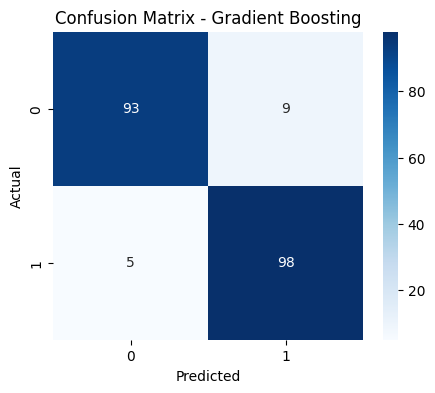

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

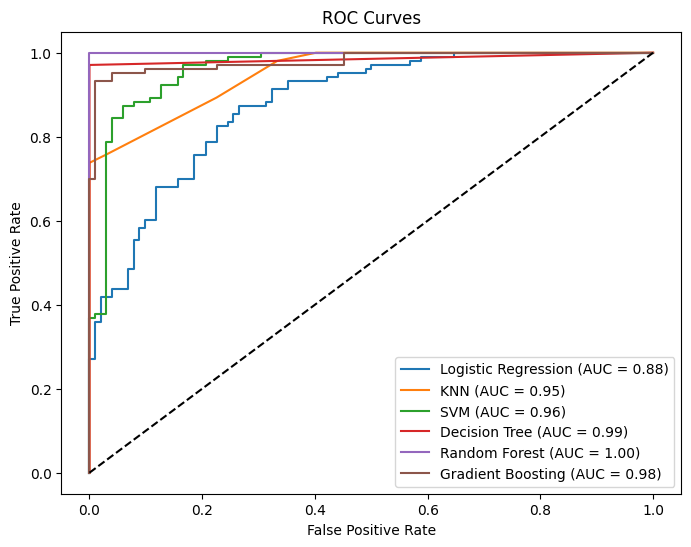

In [9]:
# ROC Curves
plt.figure(figsize=(8,6))
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr,tpr):.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

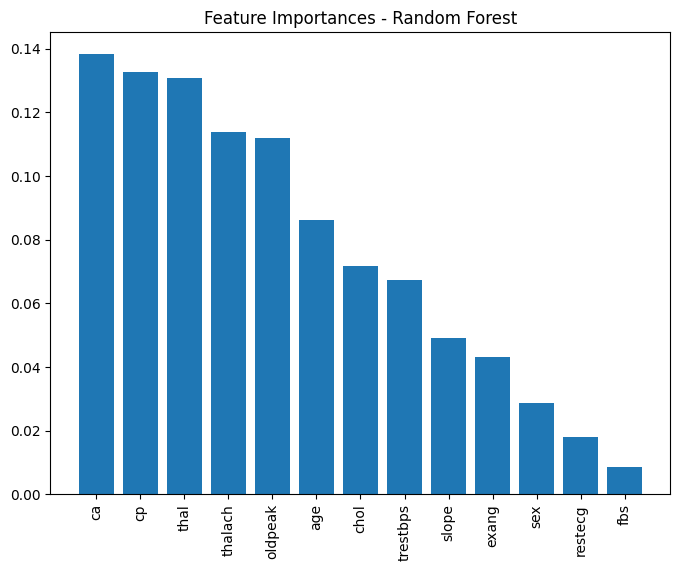

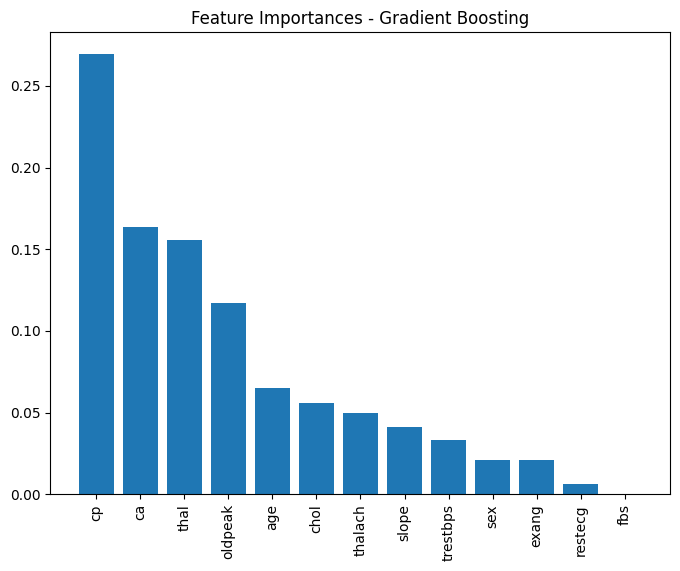

In [10]:
# Feature Importance for Random Forest and Gradient Boosting
for name in ['Random Forest', 'Gradient Boosting']:
    model = models[name]
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(8,6))
    plt.title(f'Feature Importances - {name}')
    plt.bar(range(X.shape[1]), importances[indices])
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
    plt.show()